This demo shows that our method is **resilient to overfitting**.

In [1]:
import AlgPoly as ap
import numpy as np
import PolyNN
import matplotlib.pyplot as plt
import random as rd

We will train the following (very simple) polynomial network. This will amount to do a polynomial regression.

In [2]:
net = PolyNN.PolyNN([1,1],PolyNN.identity,[3])

net will learn to be the following polynomial P :

In [3]:
#P=2X^2 + 3X +1
P = ap.Polynomial({():1, (0,):-3 , (0,0) : 2, (0,0,0) : 1})

We now create a training data with 10% noise.

In [4]:
training_data = []
for i in range(100000):
    x =  10 *np.random.rand(1)
    if rd.random()>0.1 :
        y = P.raw_evaluate(x) + np.random.normal(0,0.1) #90% of the time, we have a almost correct output
    else :
        y = P.raw_evaluate([10]) * np.random.rand(1) #the rest is utter noise
    training_data.append((x,y))

We train net. 

The noise shouldn't affect the training too much since for each step net does trying to learn noise, it makes 9 correct learning steps.

In [6]:
net.batchlearning(training_data, batch_size=10, eta=0.1, nb_epochs=5, normalize=True)

epoch 1/5 complete

epoch 2/5 complete

epoch 3/5 complete

epoch 4/5 complete

epoch 5/5 complete



Let's plot our training data (blue points) and see what our network predicts now that it is trained (red curve)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


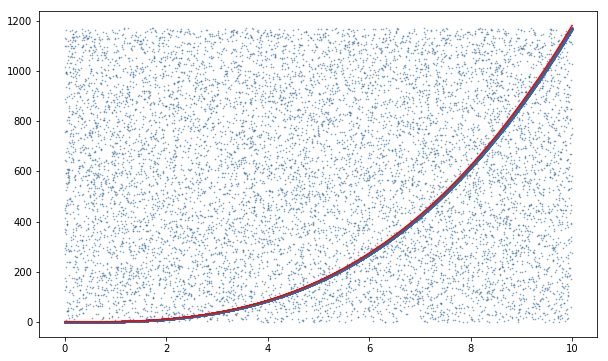

In [7]:
training_x = [x for (x,y) in training_data]
training_y = [y for (x,y) in training_data]
t = np.linspace(0,10,1000)
network_predictions = [net.feedForward(np.array([x])) for x in t]
plt.figure(figsize=(10,6))
plt.scatter(training_x,training_y,s=0.5,c=(0.2,0.4,0.6,0.5)) #a scatter view of our training set
plt.plot(t,network_predictions,'r')
plt.savefig('screenshots/regression_with_noise.png',dpi=100)
plt.show()

The network predictions are slightly to high : 

That's because the area above the graph of the polynomial P is greater than the area below. Hence, our network is slightly more attracted by the noise above that graph.